# MARKETING CAMPAIGN:

## INTRODUCTION:

This data set contains records relevant to a direct marketing campaign of a banking institution. The marketing campaign was executed through phone calls. Often, more than one call needs to be made to a single client before they either decline or agree to a term deposit subscription. The classification goal is to predict if the client will subscribe (yes/no) to the term deposit (variable y).

## DATASET

## INPUT VARIABLE:

### Bank client data:

1. age (numeric)

2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5. default: has credit in default? (categorical: 'no','yes','unknown')

6. housing: has housing loan? (categorical: 'no','yes','unknown')

7. loan: has personal loan? (categorical: 'no','yes','unknown')


### Related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular','telephone')

9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10. dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

### other attributes:

11. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

12. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

13. previous: number of contacts performed before this campaign and for this client (numeric)

14. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes:

15. emp.var.rate: employment variation rate - quarterly indicator (numeric)

16. cons.price.idx: consumer price index - monthly indicator (numeric)

17. cons.conf.idx: consumer confidence index - monthly indicator (numeric)

18. euribor3m: euribor 3 month rate - daily indicator (numeric)

19. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

20. y - has the client subscribed a term deposit? (binary: 'yes','no')

Dataset has 41,188 rows and 20 columns.

## Importing the libraries:

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd        #importing pandas library
import numpy as np         #importing numpy library
import matplotlib.pyplot as plt   #importing matplotlib library
import seaborn as sns      #importing seaborn library

In [2]:
data=pd.read_csv("campaign_data.csv")      #loading the dataset

In [3]:
data.head(10)          #printing the first 10 rows in the dataset to understand how the data is

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.tail(10)       #printing the last 10 rows in the dataset to understand how the data is

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
data.shape          #shape of the dataset

(41188, 20)

In [6]:
print("Number of inputs",len(data))          #number of observation that are recorded

Number of inputs 41188


## Exploratory Data Analysis

In [7]:
data.info()        #prints the details information ie., count of non-null values in the column, Datatype of the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [8]:
data.columns          #gives the list of the column names in the dataset

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
data.isnull().sum()     #gives the number of null values in the column

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
data.describe()       #gives the details of the dataset like mean,standard deviation e.t.c

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Univariate analysis:

In [11]:
#count the yes and no's in the y column
data.groupby("y").size()

y
no     36548
yes     4640
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

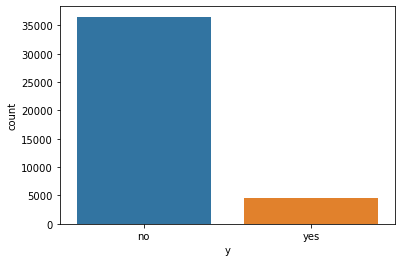

In [12]:
# Plotting the 'y' frequency
sns.countplot(data=data, x='y')

## Knowing the categorical variables

## Observation:
1. We can see most of the jobs are admin, blue-collar, technician.
2. The least is student and unkown.

By this we can observe that bank is mainly targeting high salaried people where students and unemployed in general as they don't make term deposits in general.

### Analysing the "age" categorical

In [13]:
#knowing the age categorical variable
data["age"].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [14]:
#frequency of each values
data["age"].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

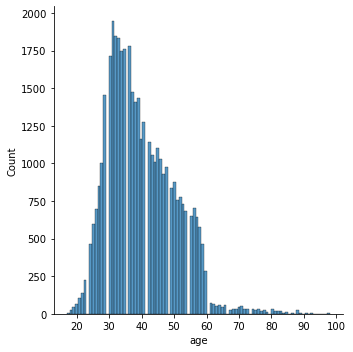

In [15]:
#plotting the age frequency table
sns.displot(data["age"])

### observation:

We can infer that most of the clients fall in the age group between 20-60.

### Analysing the "job" categorical

In [16]:
#knowing the job categorical variable
data["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [17]:
#frequency of each values
data["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

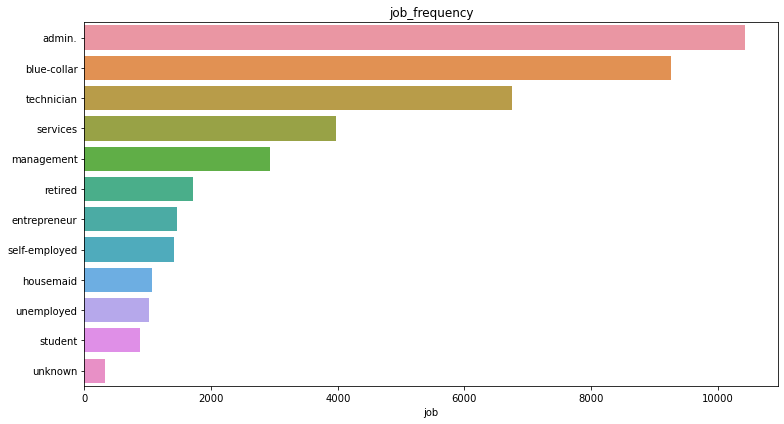

In [18]:
#plotting the job frequency table
plt.figure(figsize=(11,6))
sns.barplot(data["job"].value_counts(),data["job"].value_counts().index,data=data)
plt.title("job_frequency")
plt.tight_layout()

### Analysing the "marital" categorical

In [19]:
#knowing the marital categorical variable
data["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [20]:
#frequency of each values
data["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

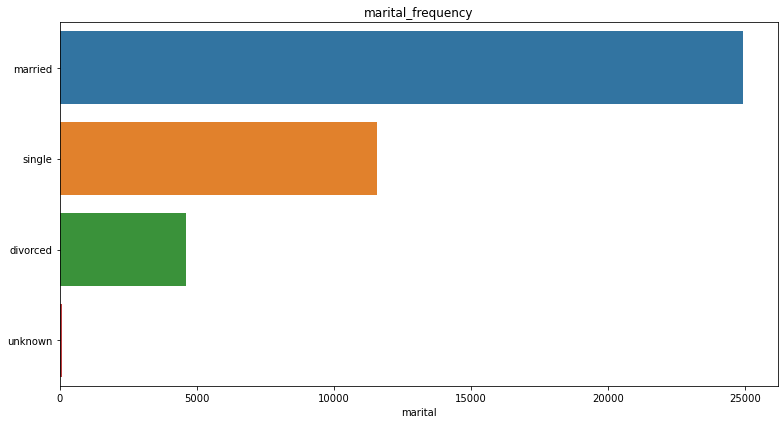

In [21]:
#plotting the marital frequency table
plt.figure(figsize=(11,6))
sns.barplot(data["marital"].value_counts(),data["marital"].value_counts().index,data=data)
plt.title("marital_frequency")
plt.tight_layout()

### Observation:
More people of type married.

### Analysing the "education" categorical

In [22]:
#knowing the education categorical variable
data["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [23]:
#frequency of each values
data["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

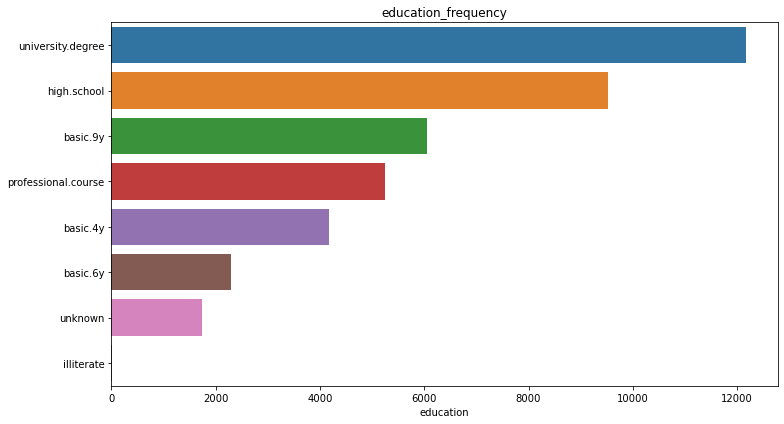

In [24]:
#plotting the education frequency table
plt.figure(figsize=(11,6))
sns.barplot(data["education"].value_counts(),data["education"].value_counts().index,data=data)
plt.title("education_frequency")
plt.tight_layout()

## Observation:
More count in university.degree people . of course High salaried people should have university degree expected. And illiterate count is very less.

### Analysing the "default" categorical

In [25]:
#knowing the default categorical variable
data["default"].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [26]:
#frequency of each values
data["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

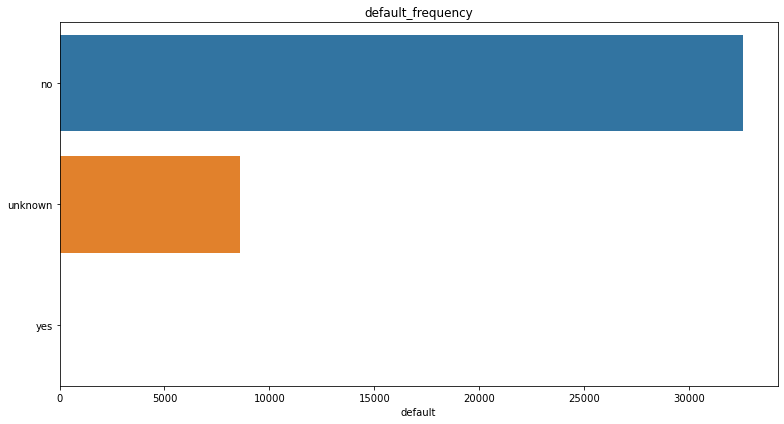

In [27]:
#plotting the education frequency table
plt.figure(figsize=(11,6))
sns.barplot(data["default"].value_counts(),data["default"].value_counts().index,data=data)
plt.title("default_frequency")
plt.tight_layout()

### Observation:
Most people have no credit default ,which means they can be approched .

### Analysing the "housing" categorical

In [28]:
#knowing the housing categorical variable
data["housing"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [29]:
#frequency of each values
data["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

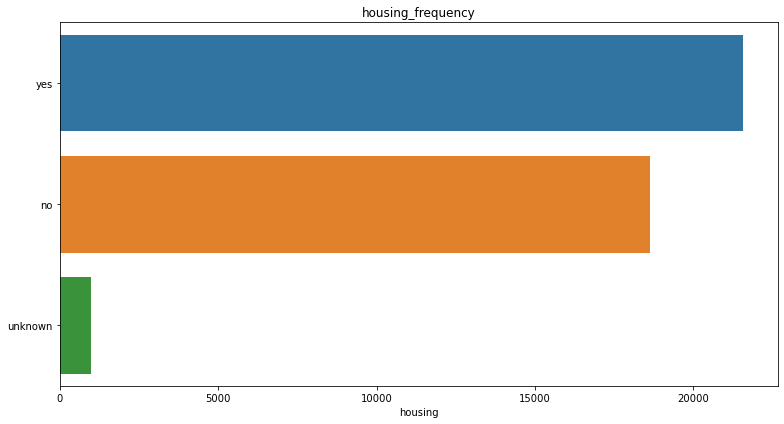

In [30]:
#plotting the housing frequency table
plt.figure(figsize=(11,6))
sns.barplot(data["housing"].value_counts(),data["housing"].value_counts().index,data=data)
plt.title("housing_frequency")
plt.tight_layout()

## Observation:

we must give more importance to people who have not taken any housing loan.

### Analysing the "loan" categorical

In [31]:
#knowing the loan categorical variable
data["loan"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [32]:
#frequency of each values
data["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

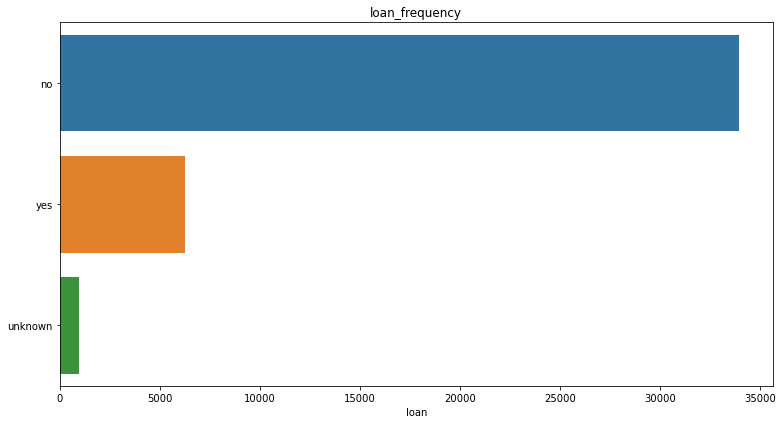

In [33]:
#plotting the housing frequency table
plt.figure(figsize=(11,6))
sns.barplot(data["loan"].value_counts(),data["loan"].value_counts().index,data=data)
plt.title("loan_frequency")
plt.tight_layout()

### Observation:
We must give more importance to people who have not taken any personal loan.

### Analysing the "contact" categorical

In [34]:
#knowing the contact categorical variable
data["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [35]:
#frequency of each values
data["contact"].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

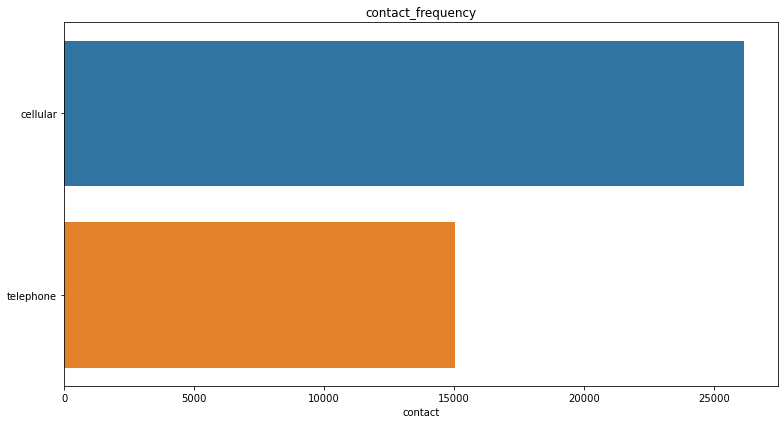

In [36]:
#plotting the contact frequency table
plt.figure(figsize=(11,6))
sns.barplot(data["contact"].value_counts(),data["contact"].value_counts().index,data=data)
plt.title("contact_frequency")
plt.tight_layout()

### Analysing the "month" categorical

In [37]:
#knowing the month categorical variable
data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [38]:
#frequency of each values
data["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

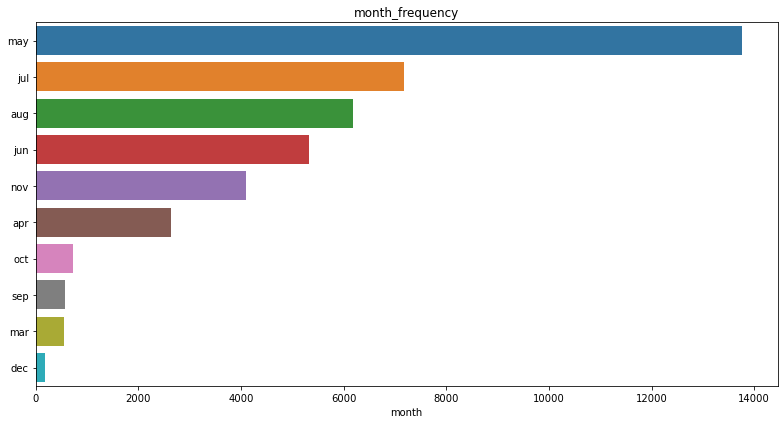

In [39]:
#plotting the month frequency table
plt.figure(figsize=(11,6))
sns.barplot(data["month"].value_counts(),data["month"].value_counts().index,data=data)
plt.title("month_frequency")
plt.tight_layout()

### Observation:
Seems May is busy season in Portuguese

### Analysing the "day_of_week" categorical

In [40]:
#knowing the day_of_week categorical variable
data["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [41]:
#frequency of each values
data["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

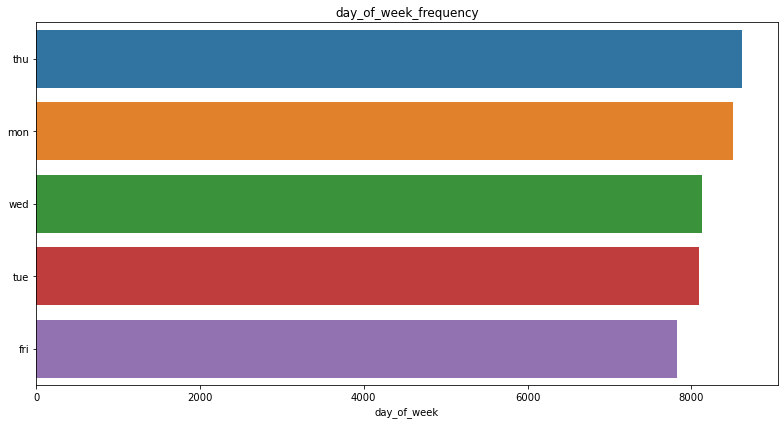

In [42]:
#plotting the day_of_week frequency table
plt.figure(figsize=(11,6))
sns.barplot(data["day_of_week"].value_counts(),data["day_of_week"].value_counts().index,data=data)
plt.title("day_of_week_frequency")
plt.tight_layout()

### Observation:

Seems every day is busy but not on weekends.

### Analysing the "poutcome" categorical

In [43]:
#knowing the poutcome categorical variable
data["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [44]:
#frequency of each values
data["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

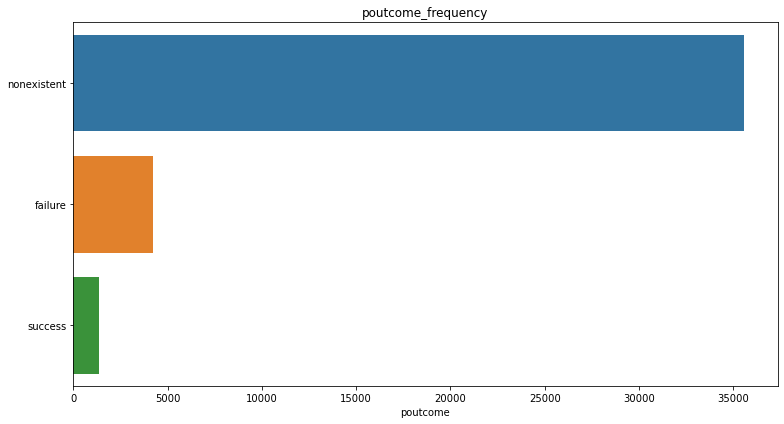

In [45]:
#plotting the day_of_week frequency table
plt.figure(figsize=(11,6))
sns.barplot(data["poutcome"].value_counts(),data["poutcome"].value_counts().index,data=data)
plt.title("poutcome_frequency")
plt.tight_layout()

### Observation:
Outcome of the previous marketing campaign- Success is small rate.

### Analysing the "y" categorical

In [46]:
#knowing the y categorical variable
data["y"].unique()

array(['no', 'yes'], dtype=object)

In [47]:
data["y"].head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [48]:
#frequency of each values
data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

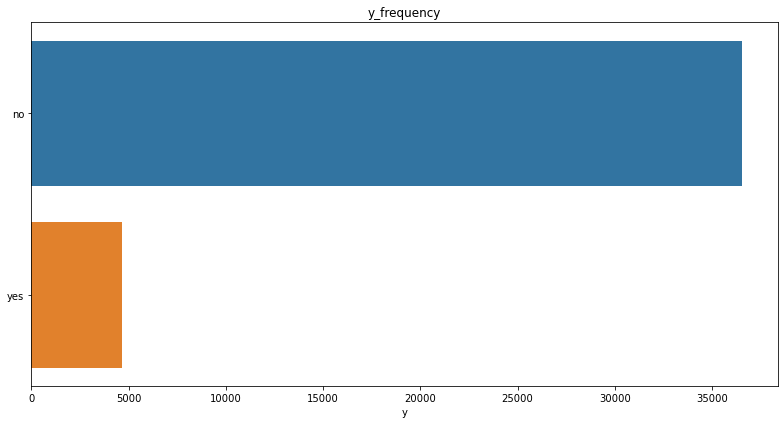

In [49]:
#plotting the y frequency table
plt.figure(figsize=(11,6))
sns.barplot(data["y"].value_counts(),data["y"].value_counts().index,data=data)
plt.title("y_frequency")
plt.tight_layout()

## Bivariate Analysis

In [50]:
from scipy import stats

### job vs y

In [51]:
#Check How Job Type correlated with Target Variable
data.groupby(['job','y']).y.count()

#Admin are more interested in Term Deposit.

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: y, dtype: int64

In [52]:
job = pd.crosstab(data['job'],data['y'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

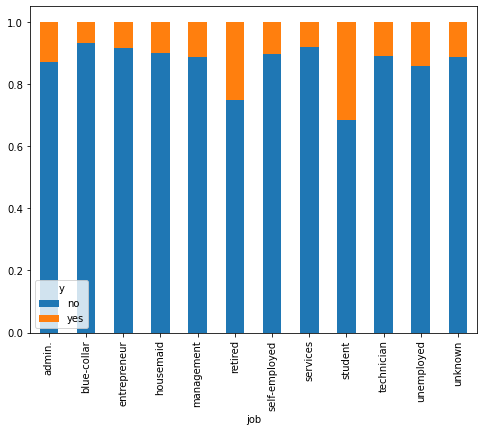

In [53]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

### Observation:
From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

### Marital status vs y

In [54]:
pd.crosstab(data['marital'], data['y'])

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [55]:
marital = pd.crosstab(data['marital'], data['y'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

y,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


<AxesSubplot:xlabel='marital'>

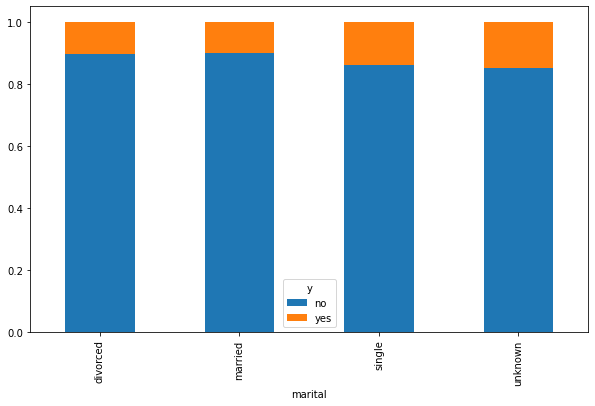

In [56]:
marital_norm.plot.bar(stacked=True, figsize=(10,6))

### Observation:
From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.

### default vs y

In [57]:
pd.crosstab(data['default'], data['y'])

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


In [58]:
dflt = pd.crosstab(data['default'], data['y'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

y,no,yes
default,,
no,0.87121,0.12879
unknown,0.94847,0.05153
yes,1.00000,0.00000


<AxesSubplot:xlabel='default'>

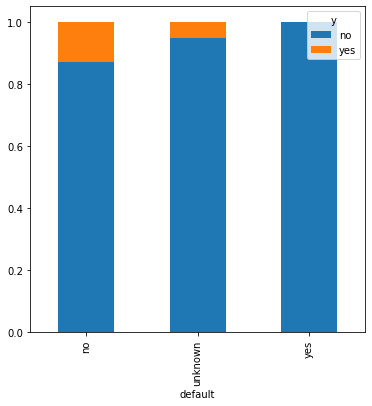

In [59]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

### Observation:
We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

### job vs marital status vs y

In [60]:
data.groupby(['job','marital','y']).y.count()

job      marital   y  
admin.   divorced  no     1148
                   yes     132
         married   no     4601
                   yes     652
         single    no     3309
                          ... 
unknown  married   yes      16
         single    no       59
                   yes      15
         unknown   no        6
                   yes       3
Name: y, Length: 90, dtype: int64

### Contact vs y

In [61]:
pd.crosstab(data['contact'], data['y'])

y,no,yes
contact,,
cellular,22291,3853
telephone,14257,787


In [62]:
dflt = pd.crosstab(data['contact'], data['y'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

y,no,yes
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313


<AxesSubplot:xlabel='contact'>

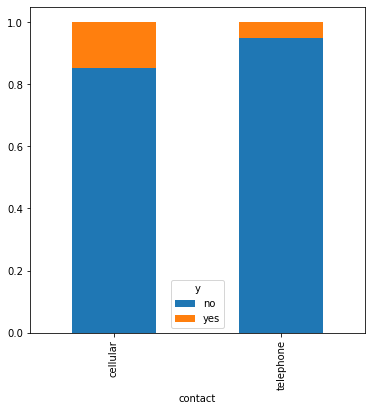

In [63]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

### Observation:
We can infer that the clients having slight higher chance of getting a term loan is who used the cellular.

### day_of_week vs y

In [64]:
pd.crosstab(data['day_of_week'], data['y'])

y,no,yes
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


In [65]:
dflt = pd.crosstab(data['day_of_week'], data['y'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

y,no,yes
day_of_week,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671


<AxesSubplot:xlabel='day_of_week'>

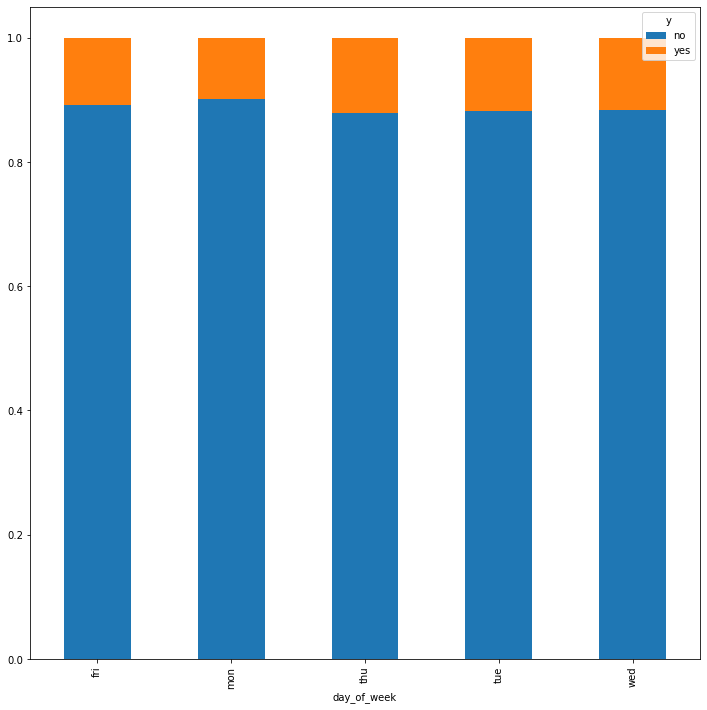

In [66]:
dflt_norm.plot.bar(stacked=True, figsize=(12,12))

### Observation: 
By seeing the above graph we can conclude that thursday, tuesday and wednesday are getting high terms loans.

## Feature Engineering:

Feature Engineering is classifying features such as numerial and categorical into groups in order to deeply section and analyze the data for results in machine learning algorithms.In this section, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical and categorical features.

## splitting of data

In [67]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# Saperating features and result vectors
y=data[['y']]
X = data.drop(['y'], axis=1)
#y = data['y'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [72]:
X_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [73]:
y_train.head()

,y
39075,no
34855,no
7107,no
31614,no
34878,no


In [74]:
y_test.head()

,y
32884,no
3169,no
32206,no
9403,no
14020,no


## Distribution of train and test data

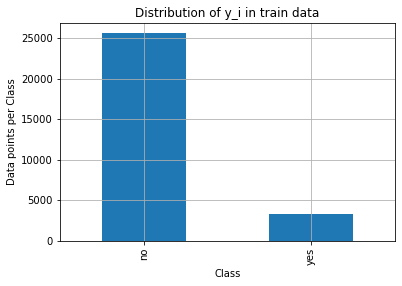

Number of data points in class 1 : 25580 ( 88.724 %)
Number of data points in class 2 : 3251 ( 11.276 %)


In [75]:
def plot_distribution(class_distribution,title,xlabel,ylabel):
    class_distribution.plot(kind='bar')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()


# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train['y'].value_counts()
test_class_distribution = y_test['y'].value_counts()


plot_distribution(train_class_distribution, 'Distribution of y_i in train data', 'Class', 'Data points per Class')

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')

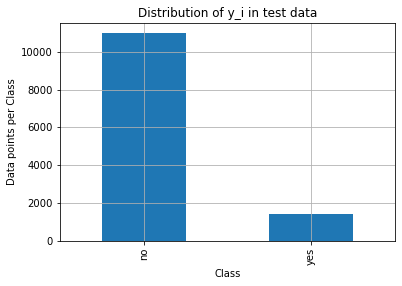

Number of data points in class 1 : 10968 ( 88.759 %)
Number of data points in class 2 : 1389 ( 11.241 %)


In [76]:
plot_distribution(test_class_distribution, 'Distribution of y_i in test data', 'Class', 'Data points per Class')

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(test_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], 
          '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

Distribution of both train and test data are same

In [77]:
# concatinate train data for data manupulation
data = pd.concat([X_train, y_train], axis=1)

In [78]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39075,29,admin.,married,university.degree,no,no,no,cellular,dec,mon,3,999,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no
34855,29,technician,single,university.degree,no,no,no,telephone,may,fri,4,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
7107,45,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
31614,34,services,married,university.degree,no,no,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no
34878,32,admin.,single,high.school,no,no,no,cellular,may,fri,9,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


In [79]:
# concatinate test data for data manupulation
data_1= pd.concat([X_test, y_test], axis=1)

In [80]:
data_1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32884,57,technician,married,high.school,no,no,yes,cellular,may,mon,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
3169,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
32206,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no
9403,36,admin.,married,high.school,no,no,no,telephone,jun,fri,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
14020,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


## Imputation:

In [81]:
def cross_tab(data,f1,f2):
    # find no of unique values in jobs colums
    jobs=list(data[f1].unique())
    # find no of unique values in education columns
    edu=list(data[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=data[data[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [82]:
cross_tab(data,'job','education')

,university.degree,basic.6y,high.school,basic.4y,professional.course,basic.9y,unknown,illiterate
job,,,,,,,,
admin.,4038,111,2344,57,263,345,180,0.0
blue-collar,62,1010,620,1658,308,2528,310,4.0
entrepreneur,410,42,161,91,93,146,43,2.0
housemaid,102,59,128,329,48,61,26,1.0
management,1421,57,208,58,66,119,85,0.0
retired,185,50,204,411,167,92,69,2.0
self-employed,550,16,77,64,122,160,25,2.0
services,118,153,1913,86,155,268,116,0.0
student,124,11,263,16,34,65,125,0.0


In [83]:
data['job'][data['age']>60].value_counts()

retired          472
housemaid         40
admin.            33
technician        26
unknown           17
management        16
blue-collar       15
unemployed         7
self-employed      7
entrepreneur       6
services           2
Name: job, dtype: int64

In [84]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

In [85]:
cross_tab(data,'job','education')

,university.degree,basic.6y,high.school,basic.4y,professional.course,basic.9y,unknown,illiterate
job,,,,,,,,
admin.,4038,111.0,2344,57.0,263.0,345.0,180.0,0.0
blue-collar,62,1025.0,620,1690.0,308.0,2551.0,310.0,4.0
entrepreneur,410,42.0,161,91.0,93.0,146.0,43.0,2.0
housemaid,102,59.0,128,355.0,48.0,61.0,0.0,1.0
management,1506,57.0,208,58.0,66.0,119.0,0.0,0.0
retired,186,50.0,204,414.0,169.0,92.0,80.0,2.0
self-employed,550,16.0,77,64.0,122.0,160.0,25.0,2.0
services,118,153.0,2029,86.0,155.0,268.0,0.0,0.0
student,124,11.0,263,16.0,34.0,65.0,125.0,0.0


## Imputation for house and loan :

In [86]:
jobhousing=cross_tab(data,'job','housing')
print(jobhousing)

                 no   yes  unknown
job                               
admin.         3280  3889      169
blue-collar    3062  3326      182
entrepreneur    444   517       27
housemaid       356   381       17
management      939  1030       45
retired         547   614       36
self-employed   461   527       28
services       1280  1464       65
student         271   349       18
technician     2035  2526      103
unemployed      284   398       20
unknown          62    75        4


In [87]:
def fillhousing(data,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        #Here we are taking value in which housing is unknow and job value is known
        ind=data[np.logical_and(np.array(data['housing']=='unknown'),np.array(data['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        data.loc[ind1,"housing"]='no'
        data.loc[ind2,"housing"]='yes'
    return data

In [88]:
data=fillhousing(data,jobhousing)

In [89]:
jobhousing=cross_tab(data,'job','housing')
print(jobhousing)

                 no   yes  unknown
job                               
admin.         3369  3969      0.0
blue-collar    3160  3410      0.0
entrepreneur    459   529      0.0
housemaid       367   387      0.0
management      963  1051      0.0
retired         564   633      0.0
self-employed   471   545      0.0
services       1313  1496      0.0
student         276   362      0.0
technician     2072  2592      0.0
unemployed      292   410      0.0
unknown          62    75      4.0


## Imputation for personnel loan and loan

In [90]:
jobloan=cross_tab(data,'job','loan')
print(jobloan)

                 no   yes  unknown
job                               
admin.         5968  1201      169
blue-collar    5413   975      182
entrepreneur    810   151       27
housemaid       635   102       17
management     1670   299       45
retired         986   175       36
self-employed   849   139       28
services       2300   444       65
student         522    98       18
technician     3880   681      103
unemployed      586    96       20
unknown         114    23        4


In [91]:
def fillloan(data,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=data[np.logical_and(np.array(data['loan']=='unknown'),np.array(data['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        data.loc[ind1,"loan"]='no'
        data.loc[ind2,"loan"]='yes'
    return data

In [92]:
data=fillloan(data,jobloan)

In [93]:
jobloan=cross_tab(data,'job','loan')
print(jobloan)

                 no   yes  unknown
job                               
admin.         6111  1227      0.0
blue-collar    5564  1006      0.0
entrepreneur    833   155      0.0
housemaid       649   105      0.0
management     1710   304      0.0
retired        1016   181      0.0
self-employed   874   142      0.0
services       2352   457      0.0
student         536   102      0.0
technician     3971   693      0.0
unemployed      600   102      0.0
unknown         114    23      4.0


## Numerical variables:

In [94]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m', 'nr.employed']
data[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,40.011203,2.575769,963.215844,0.172592,0.083202,93.577264,-40.515091,3.621599,5167.011880
std,10.450128,2.752303,185.077567,0.494338,1.570978,0.579694,4.634864,1.735202,72.542598
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Missing Values: From the source of the data (U.C. Irvine ML Repository), we're told that the missing values, or NaNs, are encoded as '999'. From the above table, it is clear that only 'pdays' has missing values. Moreover, a majority of the values for 'pdays' are missing.

In [95]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39075,29,admin.,married,university.degree,no,no,no,cellular,dec,mon,3,999,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no
34855,29,technician,single,university.degree,no,no,no,telephone,may,fri,4,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
7107,45,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
31614,34,services,married,university.degree,no,no,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no
34878,32,admin.,single,high.school,no,no,no,cellular,may,fri,9,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


In [96]:
data.shape

(28831, 20)

In [97]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<AxesSubplot:xlabel='y', ylabel='count'>

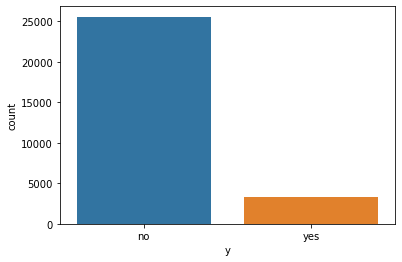

In [98]:
sns.countplot(x='y',data=data)

We can see that the data is very skewed, so we duplicate the tuples corresponding to 'yes'

In [99]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

<AxesSubplot:xlabel='y', ylabel='count'>

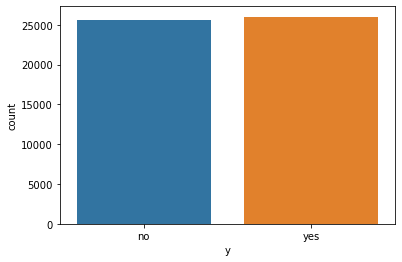

In [100]:
sns.countplot(x='y',data=data)

### Missing Values in Numerical Variables

In [101]:
def drawhist(data,feature):
    plt.hist(data[feature])

Filtered out missing values encoded with an out-of-range value when plotting the histogram of values in order to properly understand the distribution of the known values. Here, histograms were created using matplotlib.

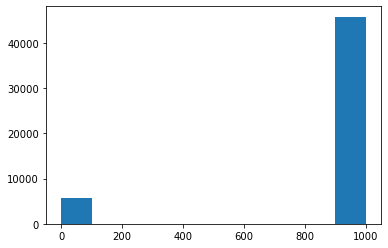

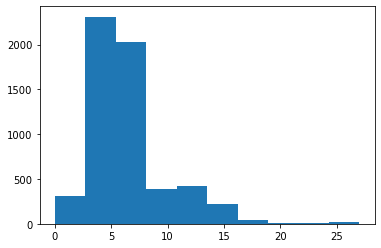

In [102]:
drawhist(data,'pdays')
plt.show()

plt.hist(data.loc[data.pdays != 999, 'pdays'])
plt.show()

In [103]:
pd.crosstab(data['pdays'],data['poutcome'], values=data['age'], aggfunc='count', normalize=True)

poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.001124
1,0.000000,0.000000,0.001182
2,0.000000,0.000000,0.003683
3,0.000019,0.000000,0.034446
4,0.000174,0.000000,0.006998
5,0.000330,0.000000,0.002830
6,0.001376,0.000000,0.032566
7,0.000698,0.000000,0.003101
8,0.000640,0.000000,0.000853


In [104]:
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data['pdays2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data['pdays']=data['pdays'].astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
39075,29,admin.,married,university.degree,no,no,no,cellular,dec,mon,...,30,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no,0
34855,29,technician,single,university.degree,no,no,no,telephone,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0
7107,45,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,...,30,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,0
31614,34,services,married,university.degree,no,no,no,cellular,may,thu,...,30,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no,0
34878,32,admin.,single,high.school,no,no,no,cellular,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0


As we can see from the above table, the majority of the values for 'pdays' are missing. The majority of these missing values occur when the 'poutcome' is 'non-existent'. This means that the majority of the values in 'pdays' are missing because the customer was never contacted before. To deal with this variable, we removed the numerical variable 'pdays' and replaced it with categorical variables with following categories: pdays,pdays2

## Outliers

<AxesSubplot:>

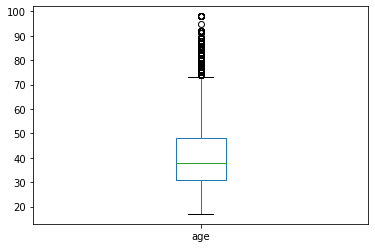

In [105]:
data.age.plot(kind='box')

In [106]:
print(data.age.max())
data[data['age'] > 80].head(5)

98


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
27813,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,30,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes,0
38032,91,retired,married,university.degree,no,no,yes,cellular,sep,wed,...,30,0,nonexistent,-3.4,92.379,-29.8,0.781,5017.5,no,0
37472,88,retired,divorced,basic.4y,no,yes,no,cellular,aug,thu,...,30,0,nonexistent,-2.9,92.201,-31.4,0.873,5076.2,no,0
39625,82,retired,married,high.school,unknown,yes,no,cellular,may,mon,...,30,0,nonexistent,-1.8,93.876,-40.0,0.682,5008.7,no,0
39466,82,retired,divorced,basic.4y,no,yes,yes,cellular,apr,mon,...,30,0,nonexistent,-1.8,93.749,-34.6,0.643,5008.7,yes,0


<AxesSubplot:ylabel='Frequency'>

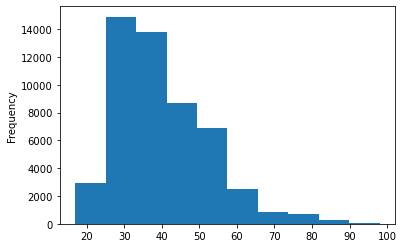

In [107]:
data.age.plot(kind='hist')

<AxesSubplot:ylabel='Density'>

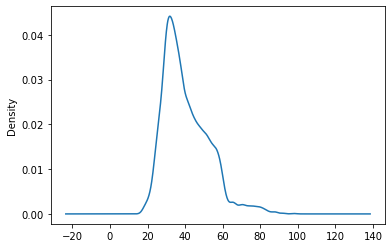

In [108]:
data.age.plot(kind='kde')

In [109]:
def binning(dataframe,featureName):
    print (featureName)
    q1 = dataframe[featureName].quantile(0.25)
    q2 = dataframe[featureName].quantile(0.50)
    q3 = dataframe[featureName].quantile(0.75)
    dataframe.loc[(dataframe[featureName] <= q1), featureName] = 1
    dataframe.loc[(dataframe[featureName] > q1) & (dataframe[featureName] <= q2), featureName] = 2
    dataframe.loc[(dataframe[featureName] > q2) & (dataframe[featureName] <= q3), featureName] = 3
    dataframe.loc[(dataframe[featureName] > q3), featureName] = 4 
    print (q1, q2, q3)

In [110]:
binning(data,'age')

age
31.0 38.0 48.0


## outliner check for feature campaign

<AxesSubplot:ylabel='Frequency'>

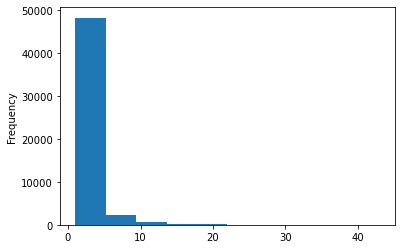

In [111]:
data.campaign.plot(kind='hist')

<AxesSubplot:>

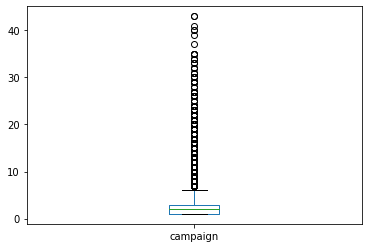

In [112]:
data.campaign.plot(kind='box')

In [113]:
print(data.campaign.max())
print(data.campaign.mean())
print(data.campaign.median())
print(data.campaign.unique())
print('Y=1 for campaign > 10' , data[(data['campaign'] > 10) & (data['y'] ==1)].age.count())
print('Y=1 for campaign < 10' , data[(data['campaign'] <= 10) & (data['y'] ==1)].age.count())
print('Y=1 for campaign = 1' , data[(data['campaign'] == 1) & (data['y'] ==1)].age.count())

43
2.334670853686904
2.0
[ 3  4  2  1  9  5  6 12  7  8 10 11 19 15 13 14 17 18 25 32 21 16 40 24
 27 22 23 35 20 43 26 29 33 31 28 34 30 41 39 37]
Y=1 for campaign > 10 0
Y=1 for campaign < 10 0
Y=1 for campaign = 1 0


In [114]:
data.groupby(['campaign','y']).y.count()

campaign  y  
1         no     10648
          yes    12928
2         no      6538
          yes     6808
3         no      3401
          yes     3224
4         no      1709
          yes     1464
5         no      1012
          yes      568
6         no       641
          yes      424
7         no       409
          yes      200
8         no       269
          yes      112
9         no       205
          yes      104
10        no       149
          yes       48
11        no       119
          yes       56
12        no        93
          yes       16
13        no        62
          yes       32
14        no        46
          yes        8
15        no        33
16        no        38
17        no        41
          yes       16
18        no        22
19        no        19
20        no        20
21        no        18
22        no        12
23        no        11
24        no        12
25        no         4
26        no         7
27        no         6
28        no        

In [115]:
data['campaign'].describe()

count    51588.000000
mean         2.334671
std          2.328928
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         43.000000
Name: campaign, dtype: float64

In [116]:
q1 = data['campaign'].quantile(0.25)
q2 = data['campaign'].quantile(0.50)
q3 = data['campaign'].quantile(0.75)

print(q1)
print(q2)
print(q3)

iqr = q3-q1 #Interquartile range

extreme_low_campaign = q1-1.5*iqr
extreme_high_capmaign = q3+1.5*iqr

print (extreme_low_campaign)
print (extreme_high_capmaign)

1.0
2.0
3.0
-2.0
6.0


In [117]:
binning(data,'campaign')

campaign
1.0 2.0 3.0


In [118]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
39075,1,admin.,married,university.degree,no,no,no,cellular,dec,mon,...,30,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no,0
34855,1,technician,single,university.degree,no,no,no,telephone,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0
7107,3,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,...,30,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,0
31614,2,services,married,university.degree,no,no,no,cellular,may,thu,...,30,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no,0
34878,2,admin.,single,high.school,no,no,no,cellular,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0


## Standardizing the data

In [119]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2'],
      dtype='object')

In [120]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
39075,1,admin.,married,university.degree,no,no,no,cellular,dec,mon,...,30,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no,0
34855,1,technician,single,university.degree,no,no,no,telephone,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0
7107,3,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,...,30,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,0
31614,2,services,married,university.degree,no,no,no,cellular,may,thu,...,30,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no,0
34878,2,admin.,single,high.school,no,no,no,cellular,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0


In [121]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [122]:
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

## Categorical variables can be either Ordinal or Nominal

In [123]:
data['poutcome'] = data['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data['default'] = data['default'].map({'yes': -1,'unknown': 0,'no': 1})
data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

## Handling Nominal Variables(One Hot Encoding)

In [124]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day_of_week']
data_one = pd.get_dummies(data,columns=nominal)
data_one['y']=data_one['y'].map({'yes': 1,'no': 0})
data_one.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
39075,0.000000,1,1,1,0.666667,1.0,0.142857,-1,0.083333,0.199532,...,0,0,0,0,0,0,1,0,0,0
34855,0.000000,1,1,1,1.000000,1.0,0.000000,0,0.333333,0.269680,...,0,1,0,0,0,1,0,0,0,0
7107,0.666667,0,-1,1,0.333333,1.0,0.000000,0,0.937500,0.698753,...,0,1,0,0,0,0,0,1,0,0
31614,0.333333,1,1,1,0.000000,1.0,0.142857,-1,0.333333,0.269680,...,0,1,0,0,0,0,0,1,0,0
34878,0.333333,1,1,1,1.000000,1.0,0.000000,0,0.333333,0.269680,...,0,1,0,0,0,1,0,0,0,0


In [125]:
data_one.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_w

In [126]:
data_one.shape

(51588, 56)

In [127]:
df_with_dummies=pd.get_dummies(data_one)

In [128]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [129]:
features_dropped = ['marital_single','contact_cellular',
                    'education_unknown','job_unknown',
     'marital_single','contact_cellular',
                    'education_unknown']
data_one = dropfeature(df_with_dummies, features_dropped)

## Analising the data distribution by plotting graphs for numerical fields

In [130]:
 data_one.describe()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
count,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,...,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000
mean,0.481165,0.842211,-0.083818,0.686090,0.327718,0.910696,0.044465,-0.012348,0.604021,0.498476,...,0.034601,0.265546,0.095487,0.042355,0.031383,0.186671,0.195472,0.217240,0.199562,0.201055
std,0.369656,0.364653,0.996452,0.727471,0.366461,0.255672,0.099432,0.465140,0.358692,0.247116,...,0.182769,0.441628,0.293890,0.201399,0.174353,0.389651,0.396567,0.412372,0.399675,0.400793
min,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.333333,0.269680,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,1.000000,-1.000000,1.000000,0.333333,1.000000,0.000000,0.000000,0.687500,0.484412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,1.000000,1.000000,1.000000,0.666667,1.000000,0.000000,0.000000,1.000000,0.698753,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
data_one.head(10)

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
39075,0.000000,1,1,1,0.666667,1.0,0.142857,-1,0.083333,0.199532,...,0,0,0,0,0,0,1,0,0,0
34855,0.000000,1,1,1,1.000000,1.0,0.000000,0,0.333333,0.269680,...,0,1,0,0,0,1,0,0,0,0
7107,0.666667,0,-1,1,0.333333,1.0,0.000000,0,0.937500,0.698753,...,0,1,0,0,0,0,0,1,0,0
31614,0.333333,1,1,1,0.000000,1.0,0.142857,-1,0.333333,0.269680,...,0,1,0,0,0,0,0,1,0,0
34878,0.333333,1,1,1,1.000000,1.0,0.000000,0,0.333333,0.269680,...,0,1,0,0,0,1,0,0,0,0
24606,0.666667,1,-1,-1,0.333333,1.0,0.142857,-1,0.687500,0.389322,...,0,0,1,0,0,0,1,0,0,0
13094,0.333333,0,1,1,0.333333,1.0,0.000000,0,1.000000,0.669135,...,0,0,0,0,0,0,0,0,1,0
36912,0.333333,1,1,1,0.000000,1.0,0.000000,0,0.104167,0.296960,...,0,0,0,0,0,0,1,0,0,0
27834,0.333333,1,-1,1,0.000000,1.0,0.000000,0,0.333333,0.250195,...,1,0,0,0,0,1,0,0,0,0
9302,0.333333,1,1,1,0.666667,1.0,0.000000,0,1.000000,0.882307,...,0,0,0,0,0,1,0,0,0,0


In [132]:
data_one.shape

(51588, 52)

In [133]:
data_one.corr()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
age,1.000000,-0.159097,-0.001234,0.004204,0.004681,-0.016179,0.014762,0.011068,0.030919,0.018910,...,-0.038413,-0.033938,0.032674,0.017616,0.005111,0.006108,0.030581,-0.024087,0.013874,-0.025249
default,-0.159097,1.000000,-0.021301,-0.002063,-0.052518,-0.116533,0.128664,0.025770,-0.269147,-0.169529,...,0.068832,-0.104417,0.061367,0.070678,0.072096,-0.019440,-0.008828,0.010356,-0.001139,0.018116
housing,-0.001234,-0.021301,1.000000,0.040237,0.003489,0.005287,-0.005901,-0.001689,0.051401,0.062877,...,-0.013346,0.021947,-0.026419,0.012764,0.002533,0.018581,-0.010879,-0.015646,0.003841,0.004968
loan,0.004204,-0.002063,0.040237,1.000000,-0.010320,0.020150,-0.003811,-0.015809,-0.010125,-0.006812,...,0.007921,-0.008251,-0.003416,0.015863,-0.003634,0.000270,-0.004269,0.004394,-0.003287,0.002718
campaign,0.004681,-0.052518,0.003489,-0.010320,1.000000,0.087789,-0.089996,-0.019361,0.184304,0.121563,...,-0.033663,0.033967,-0.082197,-0.099385,-0.037290,0.053995,0.060507,-0.043922,-0.035848,-0.031424
pdays,-0.016179,-0.116533,0.005287,0.020150,0.087789,1.000000,-0.700447,-0.659579,0.331613,0.040687,...,-0.081912,0.109855,-0.027498,-0.133870,-0.175936,0.011980,0.009906,0.002568,-0.013781,-0.010348
previous,0.014762,0.128664,-0.005901,-0.003811,-0.089996,-0.700447,1.000000,0.075520,-0.379976,-0.057011,...,0.069092,-0.061921,0.064608,0.125413,0.159271,-0.007175,-0.008406,0.001133,0.010009,0.004146
poutcome,0.011068,0.025770,-0.001689,-0.015809,-0.019361,-0.659579,0.075520,1.000000,-0.008916,0.114572,...,0.047210,-0.102090,-0.042283,0.049451,0.089394,-0.016053,0.000790,-0.002185,0.006060,0.011029
emp.var.rate,0.030919,-0.269147,0.051401,-0.010125,0.184304,0.331613,-0.379976,-0.008916,1.000000,0.716164,...,-0.142870,0.021320,-0.070048,-0.219587,-0.167067,-0.006567,0.005030,-0.013159,-0.017998,0.032894
cons.price.idx,0.018910,-0.169529,0.062877,-0.006812,0.121563,0.040687,-0.057011,0.114572,0.716164,1.000000,...,-0.105663,-0.017368,-0.137411,-0.080378,-0.020259,-0.010674,0.011871,-0.004324,-0.021168,0.024189


In [134]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

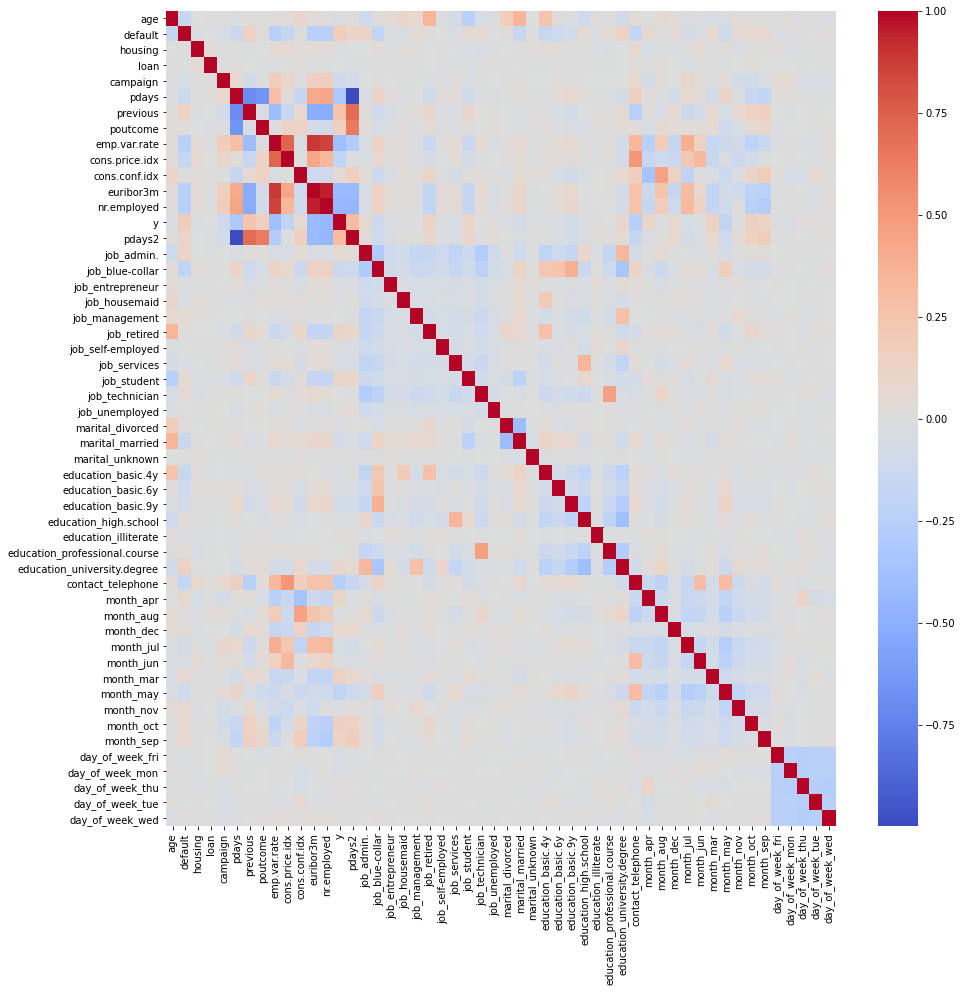

In [135]:
drawheatmap(data_one)

## Standardizing the test data

In [136]:
df= pd.concat([X_test, y_test], axis=1)

In [137]:
df.shape

(12357, 20)

In [138]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

As we seen in train data the majority of the values for 'pdays' are missing. The majority of these missing values occur when the 'poutcome' is 'non-existent'. This means that the majority of the values in 'pdays' are missing because the customer was never contacted before. To deal with this variable, we removed the numerical variable 'pdays' and replaced it with categorical variables with following categories:'pdays' and 'pdays2'

### Balancing y out

<AxesSubplot:xlabel='y', ylabel='count'>

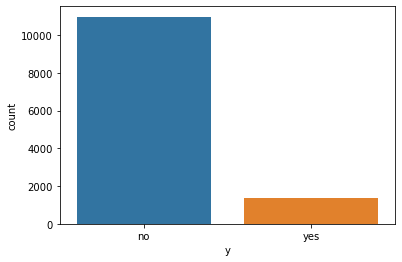

In [139]:
sns.countplot(x='y',data=df)

We can see that the data is very skewed, so we duplicate the tuples corresponding to 'yes'

In [140]:
d1=df.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data_1=d1

<AxesSubplot:xlabel='y', ylabel='count'>

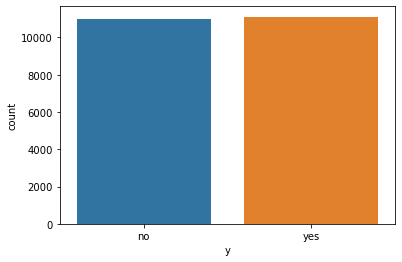

In [141]:
sns.countplot(x='y',data=data_1)

In [142]:
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data_1['pdays2']=data_1.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data_1['pdays']=data_1.apply(lambda row: function1(row),axis=1)

data_1['pdays']=data_1['pdays'].astype(int)
data_1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
32884,57,technician,married,high.school,no,no,yes,cellular,may,mon,...,30,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no,0
3169,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,...,30,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,0
32206,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,...,30,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no,0
9403,36,admin.,married,high.school,no,no,no,telephone,jun,fri,...,30,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no,0
14020,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,...,30,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,0


In [143]:
data_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2'],
      dtype='object')

In [144]:
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data_1[data_1.columns[idx_numeric]] = scaler.fit_transform(data_1[data_1.columns[idx_numeric]])

In [145]:
data_1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
32884,0.519481,technician,married,high.school,no,no,yes,cellular,may,mon,...,1.0,0.166667,failure,0.333333,0.269680,0.192469,0.150759,0.512287,no,0
3169,0.493506,unknown,married,unknown,unknown,yes,no,telephone,may,thu,...,1.0,0.000000,nonexistent,0.937500,0.698753,0.602510,0.958059,0.859735,no,0
32206,0.207792,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,...,1.0,0.166667,failure,0.333333,0.269680,0.192469,0.153933,0.512287,no,0
9403,0.246753,admin.,married,high.school,no,no,no,telephone,jun,fri,...,1.0,0.000000,nonexistent,1.000000,0.882307,0.376569,0.982317,1.000000,no,0
14020,0.129870,housemaid,married,high.school,no,yes,no,cellular,jul,fri,...,1.0,0.000000,nonexistent,1.000000,0.669135,0.338912,0.981410,1.000000,no,0


In [146]:
data_1['poutcome'] = data_1['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data_1['default'] = data_1['default'].map({'yes': -1,'unknown': 0,'no': 1})
data_1['housing'] = data_1['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data_1['loan'] = data_1['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [147]:
data_1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
32884,0.519481,technician,married,high.school,1,1,-1,cellular,may,mon,...,1.0,0.166667,-1,0.333333,0.269680,0.192469,0.150759,0.512287,no,0
3169,0.493506,unknown,married,unknown,0,-1,1,telephone,may,thu,...,1.0,0.000000,0,0.937500,0.698753,0.602510,0.958059,0.859735,no,0
32206,0.207792,blue-collar,married,basic.9y,1,1,1,cellular,may,fri,...,1.0,0.166667,-1,0.333333,0.269680,0.192469,0.153933,0.512287,no,0
9403,0.246753,admin.,married,high.school,1,1,1,telephone,jun,fri,...,1.0,0.000000,0,1.000000,0.882307,0.376569,0.982317,1.000000,no,0
14020,0.129870,housemaid,married,high.school,1,-1,1,cellular,jul,fri,...,1.0,0.000000,0,1.000000,0.669135,0.338912,0.981410,1.000000,no,0


In [148]:
data_1.shape

(22080, 21)

In [149]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day_of_week']
data_clean_1 = pd.get_dummies(data_1,columns=nominal)
data_clean_1['y']=data_clean_1['y'].map({'yes': 1,'no': 0})
data_clean_1.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
32884,0.519481,1,1,-1,0.000000,1.0,0.166667,-1,0.333333,0.269680,...,0,1,0,0,0,0,1,0,0,0
3169,0.493506,0,-1,1,0.018182,1.0,0.000000,0,0.937500,0.698753,...,0,1,0,0,0,0,0,1,0,0
32206,0.207792,1,1,1,0.000000,1.0,0.166667,-1,0.333333,0.269680,...,0,1,0,0,0,1,0,0,0,0
9403,0.246753,1,1,1,0.054545,1.0,0.000000,0,1.000000,0.882307,...,0,0,0,0,0,1,0,0,0,0
14020,0.129870,1,-1,1,0.018182,1.0,0.000000,0,1.000000,0.669135,...,0,0,0,0,0,1,0,0,0,0


In [150]:
data_clean_1.shape

(22080, 56)

In [151]:
df_with_dummies=pd.get_dummies(data_clean_1)

In [152]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [153]:
features_dropped = ['marital_single','contact_cellular',
                    'education_unknown','job_unknown',
     'marital_single','contact_cellular',
                    'education_unknown']
data_clean_1 = dropfeature(df_with_dummies, features_dropped)

In [154]:
data_clean_1.shape

(22080, 52)

In [156]:
data_clean_1.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

## Create Model

In [158]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [160]:
data_clean_1.shape

(22080, 52)

In [162]:
y_test=data_clean_1[['y']]
X_test = data_clean_1.drop(['y'], axis=1)

In [172]:
y_train=data_one[['y']]
X_train = data_one.drop(['y'], axis=1)

In [173]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [174]:
def Convert_Model(X_train,y_train,X_test,y_test,classifier):
    classifier.fit(X_train,y_train) 
    print(classifier.score(X_test,y_test)) 
    print(confusion_matrix(y_test,classifier.predict(X_test)))
    print(accuracy_score(y_test,classifier.predict(X_test)))
    print(precision_score(y_test,classifier.predict(X_test)))
    print(recall_score(y_test,classifier.predict(X_test)))
    f1 = 2 * precision_score(y_test,classifier.predict(X_test)) * recall_score(y_test,classifier.predict(X_test)) / (precision_score(y_test,classifier.predict(X_test)) + recall_score(y_test,classifier.predict(X_test)))
    print("f1 score", f1)
    return classifier

In [175]:
X_train.shape

(51588, 51)

In [176]:
X_test.shape

(22080, 51)

In [177]:
from sklearn.dummy import DummyClassifier
classifier = DummyClassifier(strategy='most_frequent',random_state=0)
finalModel = Convert_Model(X_train,y_train,X_test,y_test,classifier)

0.5032608695652174
[[    0 10968]
 [    0 11112]]
0.5032608695652174
0.5032608695652174
1.0
f1 score 0.6695589298626176


## LogisticRegression

In [178]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [179]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
finalModel_lr = Convert_Model(X_train,y_train,X_test,y_test,classifier_lr)

0.733786231884058
[[9234 1734]
 [4144 6968]]
0.733786231884058
0.8007354631119283
0.6270698344132469
f1 score 0.7033410719693146


AUC: 0.787


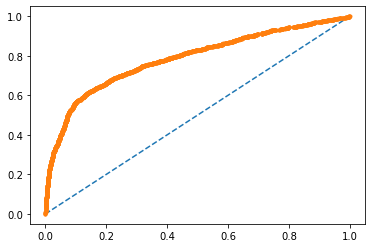

In [180]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_lr.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')

pyplot.plot(fpr, tpr, marker='.')

pyplot.show()

## Random Forest Classifier

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

### Training Random Forest Classifier

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
rfc = RandomForestClassifier(n_estimators=100)
finalModel_rfc = Convert_Model(X_train,y_train,X_test,y_test,rfc)

0.6560235507246377
[[10237   731]
 [ 6864  4248]]
0.6560235507246377
0.8531833701546495
0.38228941684665224
f1 score 0.5279970169660058


## Testing

AUC: 0.762


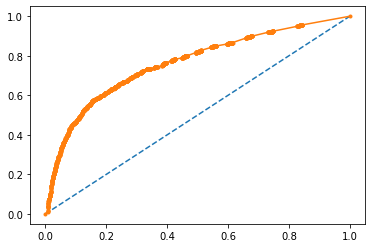

In [183]:
probs = finalModel_rfc.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')

pyplot.plot(fpr, tpr, marker='.')

pyplot.show()

## Feature Importance

In [185]:
data_one.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
39075,0.000000,1,1,1,0.666667,1.0,0.142857,-1,0.083333,0.199532,...,0,0,0,0,0,0,1,0,0,0
34855,0.000000,1,1,1,1.000000,1.0,0.000000,0,0.333333,0.269680,...,0,1,0,0,0,1,0,0,0,0
7107,0.666667,0,-1,1,0.333333,1.0,0.000000,0,0.937500,0.698753,...,0,1,0,0,0,0,0,1,0,0
31614,0.333333,1,1,1,0.000000,1.0,0.142857,-1,0.333333,0.269680,...,0,1,0,0,0,0,0,1,0,0
34878,0.333333,1,1,1,1.000000,1.0,0.000000,0,0.333333,0.269680,...,0,1,0,0,0,1,0,0,0,0


In [188]:
X = data_one.drop('y', axis=1).values
y = data_one['y'].values
pp=data_one.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
feature_importances = pd.DataFrame(rfc.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

In [189]:
feature_importances

,importance
euribor3m,0.140058
campaign,0.080358
age,0.071913
nr.employed,0.063468
emp.var.rate,0.053096
housing,0.043374
cons.conf.idx,0.031766
marital_married,0.031601
loan,0.027594
cons.price.idx,0.026597


## SVM Classifier

In [190]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Choosing the best parameters for SVM classifier based on 2-fold Cross Validation score

In [191]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

In [192]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=2, scoring='precision')

In [194]:
finalModel_gb = Convert_Model(X_train,y_train,X_test,y_test,clf)

0.7299448867115738
[[9645 1323]
 [7536 3576]]
0.5987771739130435
0.7299448867115738
0.32181425485961124
f1 score 0.44669289863219036


In [195]:
print('The best model is: ', finalModel_gb.best_params_)
print('This model produces a mean cross-validated score (precision) of', finalModel_gb.best_score_)

The best model is:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (precision) of 0.8738100934552224


In [196]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
y_true, y_pred = y_test, finalModel_gb.predict(X_test)
pre1 = precision_score(y_true, y_pred)
rec1 = recall_score(y_true, y_pred)
acc1 = accuracy_score(y_true, y_pred)
f1_1 = f1_score(y_true, y_pred)
print('precision on the evaluation set: ', pre1)
print('recall on the evaluation set: ', rec1)
print('accuracy on the evaluation set: ', acc1)
print("F1 on the evaluation set",f1_1)

precision on the evaluation set:  0.7299448867115738
recall on the evaluation set:  0.32181425485961124
accuracy on the evaluation set:  0.5987771739130435
F1 on the evaluation set 0.44669289863219036


AUC: 0.601


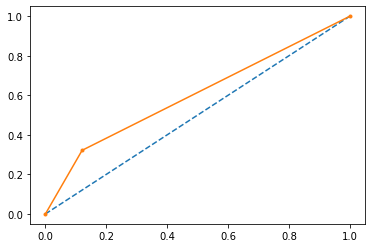

In [197]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_gb.predict(X_test)

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

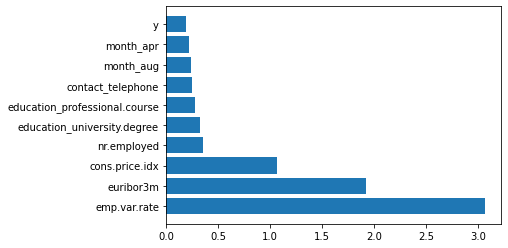

In [200]:
from matplotlib import pyplot as plt
from sklearn import svm
from matplotlib import pyplot as plt
X = data_one.drop('y', axis=1).values
y = data_one['y'].values
pp=data_one.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
features_names = ['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'] 
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
f_importances(abs(svm.coef_[0]), features_names, top=10)

Reducing Features using PCA

## XGBClassifier

In [204]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [205]:
# fit model no training data
model = XGBClassifier()
finalModel_XGB = Convert_Model(X_train,y_train,X_test,y_test,model)

[21:36:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7152173913043478
[[9336 1632]
 [4656 6456]]
0.7152173913043478
0.798219584569733
0.5809935205183585
f1 score 0.6725


AUC: 0.761


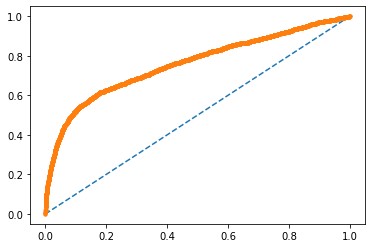

In [206]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = finalModel_XGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [209]:
import warnings
warnings.filterwarnings("ignore")


X = data_one.drop('y', axis=1).values
y = data_one['y'].values
pp=data_one.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rmodel = XGBClassifier()
rmodel.fit(X_train, y_train)
feature_importances = pd.DataFrame(rmodel.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

[21:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [208]:
feature_importances

,importance
nr.employed,0.603184
cons.conf.idx,0.041290
month_oct,0.033644
cons.price.idx,0.015075
pdays,0.011478
contact_telephone,0.010823
default,0.010499
poutcome,0.008911
month_apr,0.008689
euribor3m,0.008255


## Pretty table:

In [210]:
from prettytable import PrettyTable    
x = PrettyTable()

x.field_names = ["MODEL", "ACCURACY_score","precision_score","Recall_score","F1 score","AUC"]
x.add_row(["Dummy classifer",0.503, 0.503,1,0.669,"NAN"])
x.add_row(["Logistic Regression)", 0.733, 0.800,0.627,0.703,0.787])
x.add_row(["Random Forest",0.656, 0.853,0.382,0.527,0.762])
x.add_row(["SVM classifier",0.598, 0.729,0.321,0.446,0.601])
x.add_row(["XGB boost",0.715, 0.798,0.580,0.672,0.761])

print(x)

Bank Marketing
+----------------------+----------------+-----------------+--------------+----------+-------+
|        MODEL         | ACCURACY_score | precision_score | Recall_score | F1 score |  AUC  |
+----------------------+----------------+-----------------+--------------+----------+-------+
|   Dummy classifer    |     0.503      |      0.503      |      1       |  0.669   |  NAN  |
| Logistic Regression) |     0.733      |       0.8       |    0.627     |  0.703   | 0.787 |
|    Random Forest     |     0.656      |      0.853      |    0.382     |  0.527   | 0.762 |
|    SVM classifier    |     0.598      |      0.729      |    0.321     |  0.446   | 0.601 |
|      XGB boost       |     0.715      |      0.798      |     0.58     |  0.672   | 0.761 |
+----------------------+----------------+-----------------+--------------+----------+-------+


## Observation:

By observing the above table the accuracy score is high in logistic regression with the accuracy score of 73.3%.

## References:

In [ ]:
#https://medium.com/@ashim.maity8/predict-if-the-client-will-subscribe-a-term-deposit-or-not-using-machine-learning-c6e4024c7028
#https://medium.com/swlh/using-machine-learning-to-predict-subscription-to-bank-term-deposits-for-clients-with-python-aec8a4690807